[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%204/Leçon_4_Demo_conv.ipynb)

# ELE8812 - Traitement fréquentielle

## Démo :  Mise en oeuvre de la convolution dans le domaine frequentiel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,6)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


## Convolution dans le domaine spatial et dans le domaine spectral

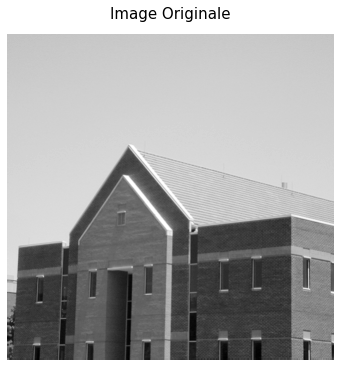

In [3]:
# Charger image
A = plt.imread('Repo/Data/Maison.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

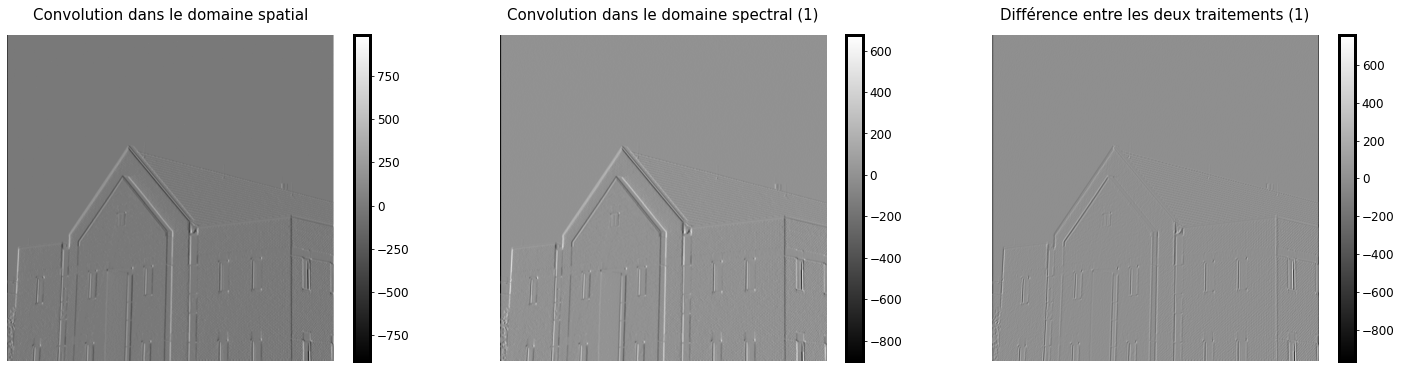

In [4]:
# Matrice de convolution
h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Convolution domaine spatial
Br = signal.convolve2d(A,h,mode='same')
plt.subplot(131);
plt.imshow(Br,cmap='gray'); plt.title('Convolution dans le domaine spatial'); plt.colorbar(); plt.axis('off');

# Convolution domaine fréquentiel
M,N = A.shape
AA = np.fft.fft2(A, (M+2, N+2))
H = np.fft.fft2(h, (M+2, N+2))

Bf = np.real(np.fft.ifft2(AA*H))

Bf = Bf[:M,:N]
plt.subplot(132);
plt.imshow(Bf,cmap='gray'); plt.title('Convolution dans le domaine spectral (1)'); plt.colorbar(); plt.axis('off');

# Différence
plt.subplot(133);
plt.imshow(Bf-Br,cmap='gray'); plt.title('Différence entre les deux traitements (1)'); plt.colorbar(); plt.axis('off'); plt.show()

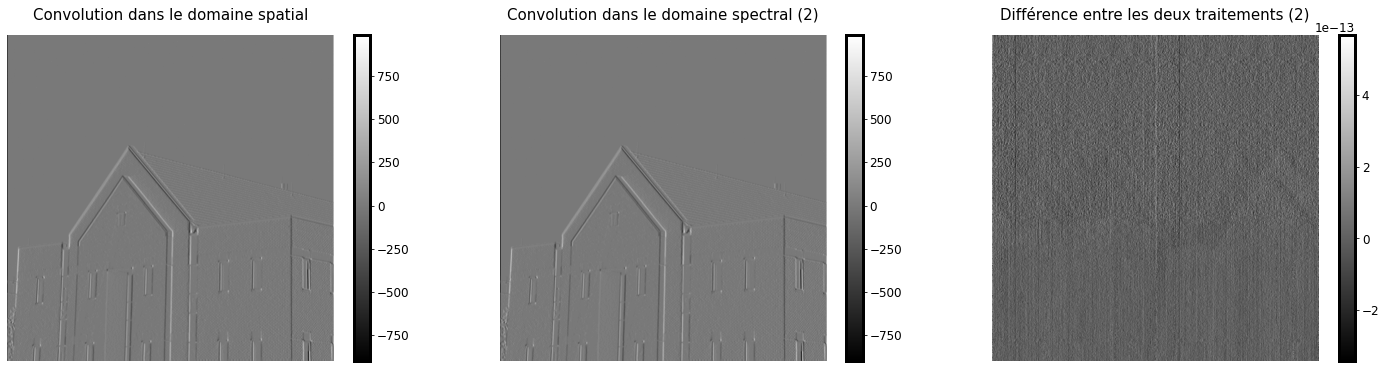

In [5]:
# Convolution domaine fréquentiel
Bf = np.real(np.fft.ifft2(AA*H))
Bf = Bf[1:M+1, 1:N+1]

plt.subplot(131);
plt.imshow(Br,cmap='gray'); plt.title('Convolution dans le domaine spatial'); plt.colorbar(); plt.axis('off');
plt.subplot(132);
plt.imshow(Bf,cmap='gray'); plt.title('Convolution dans le domaine spectral (2)'); plt.colorbar(); plt.axis('off');
plt.subplot(133);
plt.imshow(Bf-Br,cmap='gray'); plt.title('Différence entre les deux traitements (2)'); plt.colorbar(); plt.axis('off'); plt.show()

## Convolution et prolongement

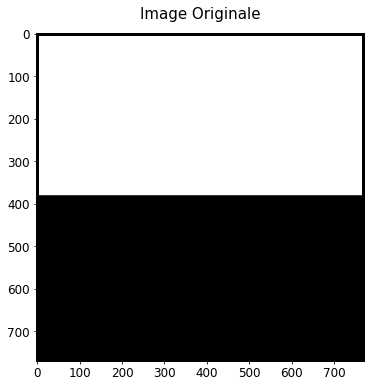

In [6]:
# Charger image
A = plt.imread('Repo/Data/Carre.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.show();

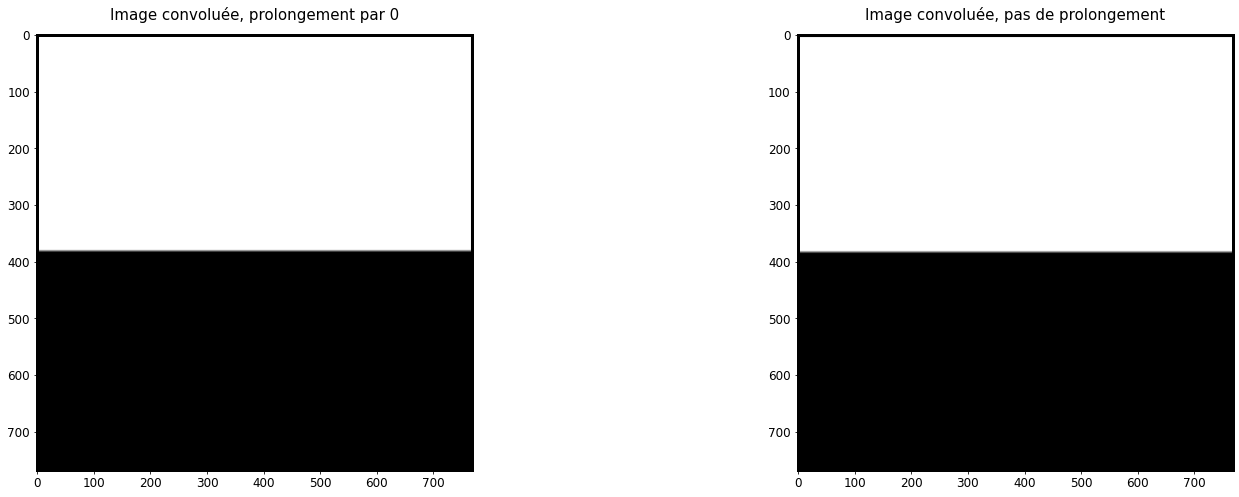

In [7]:
# Matrice de convolution
h = np.ones((5, 5)) / 25

M, N = A.shape

# Prolongement par 0
AAa = np.fft.fft2(A, (M+4, N+4));
Ha = np.fft.fft2(h, (M+4, N+4));
Ba = np.fft.ifft2(AAa*Ha);
Ba = Ba[2:M+2, 2:N+2];

# Pas de prolongement
AAs = np.fft.fft2(A);
Hs = np.fft.fft2(h, (M, N));
Bs = np.fft.ifft2(AAs*Hs);

plt.rcParams['figure.figsize'] = (25,8)
plt.subplot(121);
plt.imshow(np.real(Ba),cmap='gray'); plt.title('Image convoluée, prolongement par 0'); 
plt.subplot(122);
plt.imshow(np.real(Bs),cmap='gray'); plt.title('Image convoluée, pas de prolongement'); 
plt.show();

In [8]:
print('Valeur des pixels, prolongement par 0') 
print(np.real(Ba[0:5, 0:5]))
print('')
print('Valeur des pixels, pas de prolongement') 
print(np.real(Bs[0:5, 0:5]))

Valeur des pixels, prolongement par 0
[[ 82.8 110.4 138.  138.  138. ]
 [110.4 147.2 184.  184.  184. ]
 [138.  184.  230.  230.  230. ]
 [138.  184.  230.  230.  230. ]
 [138.  184.  230.  230.  230. ]]

Valeur des pixels, pas de prolongement
[[ 46.  46.  46.  46.  46.]
 [ 92.  92.  92.  92.  92.]
 [138. 138. 138. 138. 138.]
 [184. 184. 184. 184. 184.]
 [230. 230. 230. 230. 230.]]
